In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [2]:
# Load Dataset
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape
# 50,000 images, 32px by 32px, 3 color channels

(50000, 32, 32, 3)

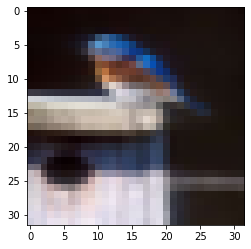

In [5]:
plt.imshow(x_train[13])

## Data Preprocessing

In [6]:
x_train[0].max()

255

In [7]:
# Each image goes from 0-255 for each of the color channels.
# So we will scale
x_train = x_train/255
x_test = x_test/255

In [8]:
# How many images in test set?
x_test.shape

(10000, 32, 32, 3)

In [9]:
# What do our labels look like?
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [10]:
# We should convert to categorical
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [11]:
y_train[0]

array([6], dtype=uint8)

## Model Creation

In [12]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4),
                input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional Layer 
model.add(Conv2D(filters=32, kernel_size=(4,4),
                input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))  # Multiclass -> softmax

model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])  # keras.io/metrics

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [14]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [15]:
model.fit(x_train, y_cat_train,
            epochs=20,
            validation_data=(x_test, y_cat_test),
            callbacks=[early_stop])

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4890 - accuracy: 0.4606 - val_loss: 1.2605 - val_accuracy: 0.5570
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1663 - accuracy: 0.5865 - val_loss: 1.1190 - val_accuracy: 0.6080
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0182 - accuracy: 0.6431 - val_loss: 1.0338 - val_accuracy: 0.6378
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9105 - accuracy: 0.6814 - val_loss: 1.0384 - val_accuracy: 0.6448
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8233 - accuracy: 0.7113 - val_loss: 0.9529 - val_accuracy: 0.6713
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7508 - accuracy: 0.7366 - val_loss: 0.9940 - val_accuracy: 0.6628
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6778 - accuracy: 0.7622 - val_loss: 0.9896 - val_accuracy:

## Model Evaluation

<AxesSubplot:>

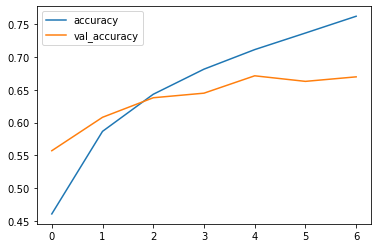

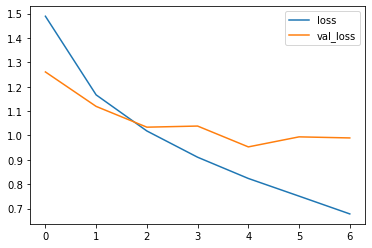

In [17]:
metrics = pd.DataFrame(model.history.history)

metrics[['accuracy', 'val_accuracy']].plot();
metrics[['loss', 'val_loss']].plot();


In [37]:
# Final metrics
metrics.iloc[-1,:]

loss            0.677823
accuracy        0.762160
val_loss        0.989640
val_accuracy    0.669700
Name: 6, dtype: float64

In [39]:
# Same as above
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9896 - accuracy: 0.6697


[0.9896395802497864, 0.669700026512146]

In [43]:
# We need our predictions to make a confusino matrix
#predictions = model.predict_classes(x_test)  # deprecated function
predictions = np.argmax(model.predict(x_test), axis=-1)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72      1000
           1       0.90      0.63      0.74      1000
           2       0.59      0.51      0.55      1000
           3       0.50      0.45      0.47      1000
           4       0.60      0.64      0.62      1000
           5       0.54      0.65      0.59      1000
           6       0.71      0.79      0.75      1000
           7       0.72      0.75      0.73      1000
           8       0.76      0.78      0.77      1000
           9       0.71      0.80      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [45]:
confusion_matrix(y_test, predictions)

array([[695,   8,  54,  18,  32,  17,  16,  22,  99,  39],
       [ 38, 626,  17,  14,  16,  11,  22,  10,  53, 193],
       [ 61,   3, 509,  60, 102, 109,  86,  43,  14,  13],
       [  9,   3,  69, 450,  90, 229,  84,  32,  17,  17],
       [ 10,   0,  61,  58, 643,  61,  66,  82,  14,   5],
       [  9,   0,  42, 151,  52, 649,  30,  53,   8,   6],
       [  6,   2,  47,  61,  33,  32, 794,  14,   5,   6],
       [ 13,   0,  26,  42,  75,  74,   8, 746,   5,  11],
       [ 64,  26,  16,  24,  20,  11,  10,   5, 784,  40],
       [ 33,  30,  17,  26,  12,  15,   7,  23,  36, 801]], dtype=int64)

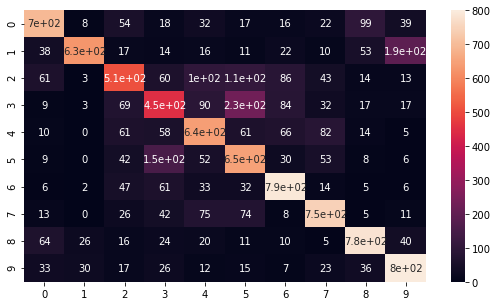

In [49]:
plt.figure(figsize=(9,5))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True);

In [50]:
# Examining a single image
single_image = x_test[0]

In [51]:
# we know it is a ...
y_test[0]

array([3], dtype=uint8)

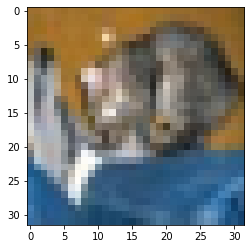

In [52]:
plt.imshow(single_image)